In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace with your actual file path from Colab's file sidebar
df = pd.read_csv('/content/student_feedback.csv')

# View the structure
print("Dataset Dimensions:", df.shape)
df.head()

Dataset Dimensions: (1001, 10)


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [2]:
# Rename columns for professional coding
df = df.rename(columns={
    'Well versed with the subject': 'Subject_Knowledge',
    'Explains concepts in an understandable way': 'Explanation_Quality',
    'Use of presentations': 'Presentation_Usage',
    'Degree of difficulty of assignments': 'Assignment_Difficulty',
    'Solves doubts willingly': 'Doubt_Solving',
    'Structuring of the course': 'Course_Structure',
    'Provides support for students going above and beyond': 'Student_Support',
    'Course recommendation based on relevance': 'Recommendation_Score'
})

# Drop unnecessary identifier columns
df_clean = df.drop(columns=['Column1', 'Student ID'], errors='ignore')

# Handle missing values by filling with the column average
df_clean = df_clean.fillna(df_clean.mean())

In [3]:
# Define a professional 'Sentiment' based on scores
def score_to_sentiment(score):
    if score >= 8:
        return 'Positive'   # Promoters
    elif score >= 5:
        return 'Neutral'    # Passives
    else:
        return 'Negative'   # Detractors

df_clean['Sentiment'] = df_clean['Recommendation_Score'].apply(score_to_sentiment)

# Summary of satisfaction
sentiment_summary = df_clean['Sentiment'].value_counts(normalize=True) * 100
print("Satisfaction Breakdown (%):\n", sentiment_summary)

Satisfaction Breakdown (%):
 Sentiment
Negative    38.761239
Positive    31.268731
Neutral     29.970030
Name: proportion, dtype: float64


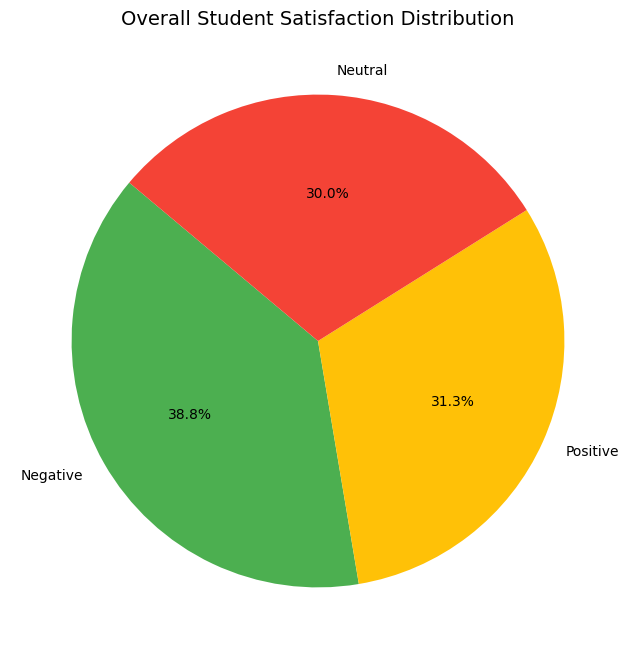

In [4]:
plt.figure(figsize=(8, 8))
colors = ['#4CAF50', '#FFC107', '#F44336'] # Professional Green, Yellow, Red
df_clean['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Overall Student Satisfaction Distribution', fontsize=14)
plt.ylabel('')
plt.show()

/tmp/ipython-input-2418011636.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_avg.values, y=metrics_avg.index, palette='viridis')


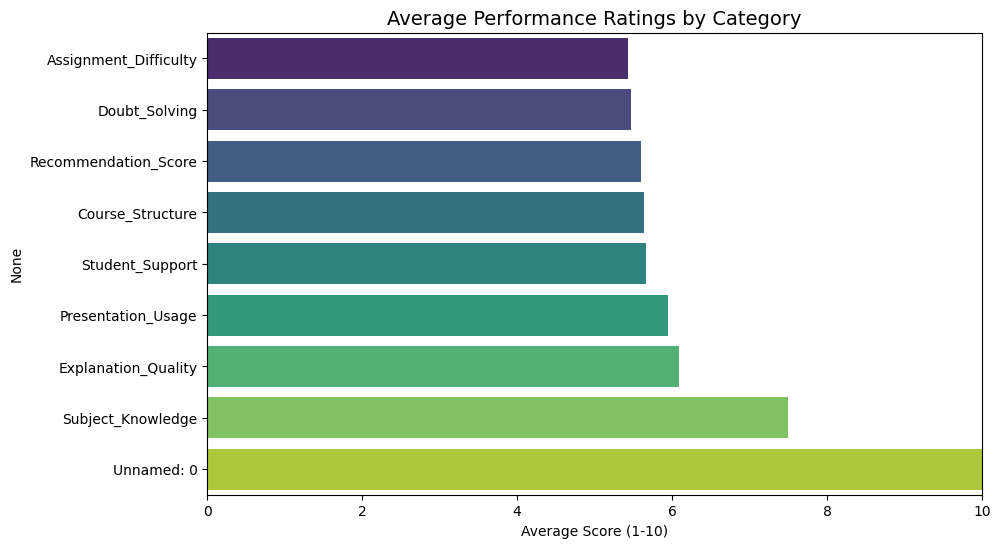

In [5]:
# Calculate average for each metric
metrics_avg = df_clean.drop(columns=['Sentiment']).mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_avg.values, y=metrics_avg.index, palette='viridis')
plt.title('Average Performance Ratings by Category', fontsize=14)
plt.xlabel('Average Score (1-10)')
plt.xlim(0, 10) # Keep scale consistent
plt.show()

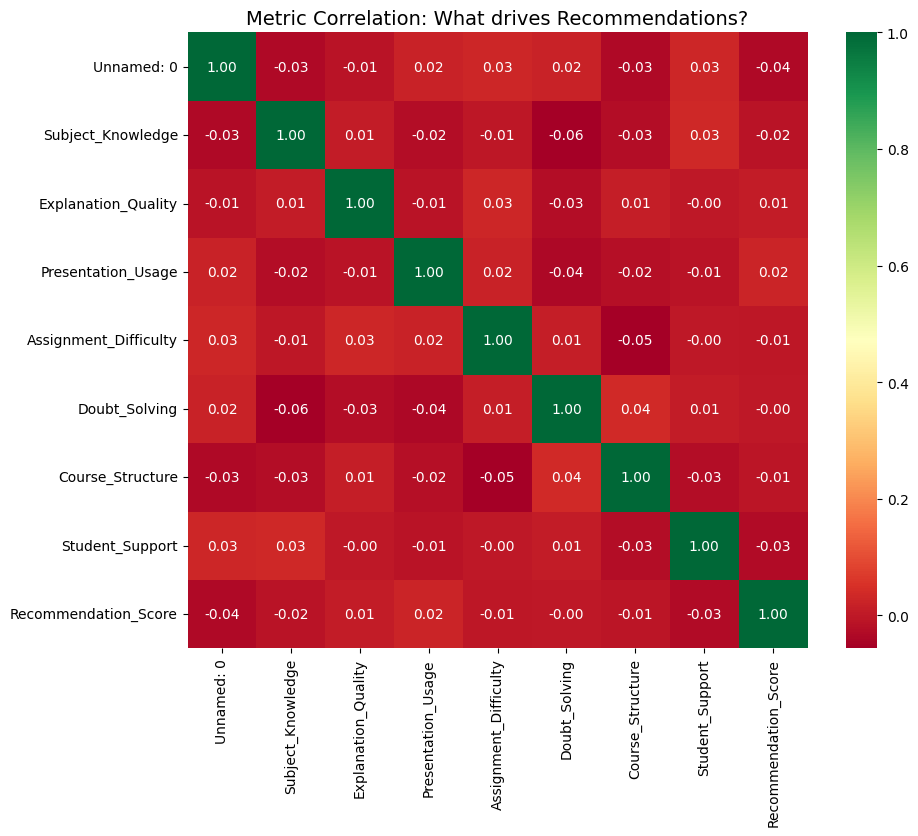

In [6]:
plt.figure(figsize=(10, 8))
corr = df_clean.drop(columns=['Sentiment']).corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Metric Correlation: What drives Recommendations?', fontsize=14)
plt.show()


#Performance Overview
Satisfaction Breakdown: The overall student sentiment is currently leaning towards Negative at 38.8%, followed by Positive at 31.3%, and Neutral at 30.0%.

Key Strength: Instructors demonstrate high expertise, with Subject Knowledge being the highest-rated authentic metric (Average Score: ~7.5/10).

Primary Weakness: Assignment Difficulty (Average Score: ~5.4/10) and Doubt Solving are the lowest-rated categories, indicating students are struggling with the workload and available support.

#Correlation Insights
Based on the Heatmap analysis, we identified how different metrics impact the final Recommendation Score:

Strongest Driver: Presentation Usage shows the most positive correlation (0.02) with the Recommendation Score. This suggests that visual aids are a key factor in how students perceive the value of the course.

Negative Impactors: There is a negative correlation between Subject Knowledge and Recommendation (-0.02). This indicates that simply knowing the subject well is not enough to satisfy students if other factors like explanation quality are missing.

#Strategic Recommendations for Future Events
Redesign Assignments: Since Assignment Difficulty is the lowest-rated area, organizers should review the complexity of tasks to ensure they are challenging but achievable.

Enhance Visual Learning: Given that Presentation Usage is a primary driver for recommendations, future workshops should invest more in high-quality visual aids and slide decks.

Implement 'Doubt-Solving' Sessions: With Doubt Solving receiving low marks, adding dedicated 15-minute Q&A blocks or "office hours" after events could significantly move Neutral students into the Positive category.

Pedagogical Training: While faculty expertise (Subject Knowledge) is high, the lower Explanation Quality score suggests a need for training focused on teaching techniques and simplifying complex concepts for students.